In [1]:
%matplotlib inline
%pylab inline

# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell
from jupyterthemes import jtplot

jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')

import numpy as np
import csv
import os
from multistep_lstm_company_no_differencing import MultiStepLSTMCompanyNoDifferencing
from multistep_lstm_company import MultiStepLSTMCompany

from datetime import date
import math
#



Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [4]:
indicators = "all"
model_types = ["vanilla", "stacked", "stacked", "bi", "cnn", "conv"] # ["vanilla", "stacked", "stacked", "bi", "cnn", "conv"] #
start_train_date = "01/01/2000"
end_train_start_test_date = "10/01/2018"
end_test_date = "20/01/2019"
obj = MultiStepLSTMCompany("AMZN", start_train_date, end_train_start_test_date,
                                                       end_test_date, n_lag=3, n_seq=1, n_epochs=1000,
                                                       n_neurons=52, n_batch="full_batch", tech_indicators=indicators,
                                                       model_type="vanilla")
obj.train()


Preprocessing the data
Retrieved price series and raw pd from disk


AttributeError: 'TechIndicators' object has no attribute 'get_s'

Reseting the lstm model


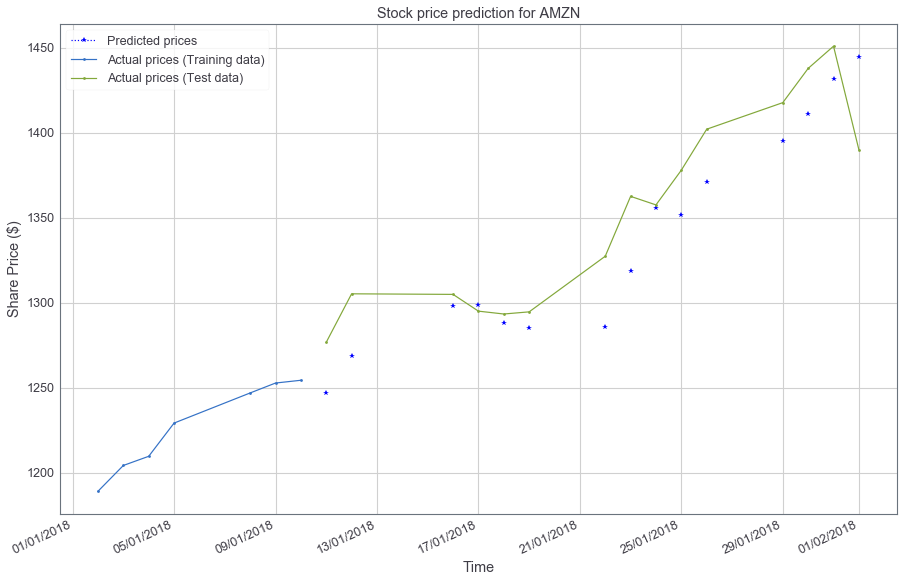

Correct counts:  109   Size of test set: 257
t+1 APRE: 0.017477


In [5]:
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
jtplot.style(theme='grade3')
predictions = obj.predict()
obj.plot(predictions, "01/01/2018", "01/02/2018")
trend_score = obj.score(metric="trend", predictions=predictions)
lstm_score = obj.score(metric="rmse", predictions=predictions)
apre_score = obj.score(metric="apre", predictions=predictions)